In [12]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

train_data_path = './traindata.csv'
train_df = pd.read_csv(train_data_path)
train_df.head() # read and view train data

,userId,gender,sport,duration,calories,distance,avg_heart_rate,avg_alti,change_alti,max_alti,min_alti,avg_speed
0,11889307,unknown,bike,6645,530.000,46.04,102.558,17.284400,716.20000,57.2,-11.80000,30.975838
1,1912029,female,run,4644,848.631,10.89,163.444,498.367200,272.40000,515.8,475.80000,8.447024
2,4584909,male,run,6197,1660.000,16.01,156.700,132.403600,459.20000,175.6,115.40000,9.184510
3,80101,male,run,2434,785.000,9.92,179.794,5.583602,99.59989,12.0,-6.79999,14.782554
4,3987593,male,bike,4557,1203.000,30.00,163.164,791.199200,361.80000,800.4,784.80000,23.559545


In [13]:
test_data_path = './testdata.csv'
test_df = pd.read_csv(test_data_path)
test_df.head() # read and view test data

,userId,gender,sport,duration,calories,distance,avg_heart_rate,avg_alti,change_alti,max_alti,min_alti,avg_speed
0,13577416,male,run,1837,459.0,5.42,161.454,144.7128,39.4,150.8,138.4,11.220029
1,3235195,male,run,2814,868.0,9.99,160.830,104.9160,227.8,136.4,91.6,12.655654
2,3714939,male,bike,1619,296.0,15.06,128.952,-31.9452,99.8,0.0,-54.6,33.603039
3,1520156,male,run,3978,658.0,12.95,144.386,106.7372,109.0,114.8,100.0,11.710390
4,11884453,male,run,2929,617.0,10.33,149.358,147.9240,159.8,163.0,135.0,12.741556


In [14]:
# define data with three different workout type
train_df_run = train_df[train_df['sport']=='run']
train_df_bike = train_df[train_df['sport']=='bike']
train_df_mountain = train_df[train_df['sport']=='mountain bike']

test_df_run = test_df[test_df['sport']=='run']
test_df_bike = test_df[test_df['sport']=='bike']
test_df_mountain = test_df[test_df['sport']=='mountain bike']

In [15]:
# import ML library
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
gender_dict = {'female': 0, 'male': 1, 'unknown':2}

def train_model(train_df, test_df, clf):
    # numeralize gender
    train_df['gender_idx'] = train_df.gender.apply(lambda x:gender_dict[x])
    test_df['gender_idx'] = test_df.gender.apply(lambda x:gender_dict[x])
    
    # extract feature and define data sets
    train_df = train_df[['gender_idx', 'calories', 'avg_heart_rate', 'avg_speed', 'duration']]
    test_df = test_df[['gender_idx', 'calories', 'avg_heart_rate', 'avg_speed', 'duration']]
    x_train = train_df.drop(['duration'], axis=1)
    y_train = train_df.duration
    x_test = test_df.drop(['duration'], axis=1)
    y_test = test_df.duration
    print(type(clf))
    
    # normalize data
    scaler = StandardScaler().fit(train_df)
    train_df = scaler.transform(train_df)
    test_df = scaler.transform(test_df)
    
    # fit data
    clf.fit(x_train, y_train)
    # view score
    score = clf.score(x_test, y_test)
    # predict and evaluate test data
    y_pred = clf.predict(x_test)
    # evaluate rmse
    print('score:{}, RMSE:{}'.format(score, np.sqrt(mean_squared_error(y_test,y_pred))))
    
    # plot first 100 data and show evaluation performance 
    plt.figure()
    plt.plot(np.arange(len(y_pred[:100])), y_test[:100],'go-',label='true value')
    plt.plot(np.arange(len(y_pred[:100])),y_pred[:100],'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()
    plt.show()

    return clf

<class 'sklearn.linear_model._base.LinearRegression'>
score:0.8460593565686145, RMSE:778.8651171295442


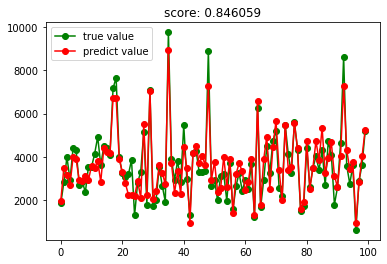

<class 'sklearn.linear_model._base.LinearRegression'>
score:0.6208878879586424, RMSE:1493.2660657299127


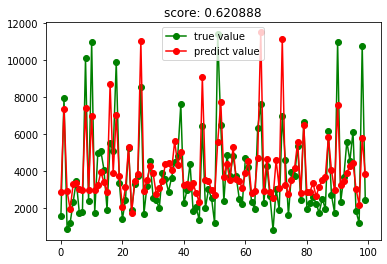

<class 'sklearn.linear_model._base.LinearRegression'>
score:0.7630596827706525, RMSE:1280.3214935624899


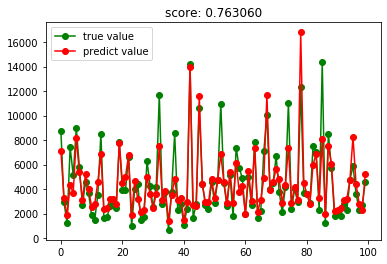

In [17]:
# call linear regression function for different workout type 
run_clf = train_model(train_df_run, test_df_run, LinearRegression())
bike_clf = train_model(train_df_bike, test_df_bike, LinearRegression())
mountain_clf = train_model(train_df_mountain, test_df_mountain, LinearRegression())

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
score:0.7523361912861758, RMSE:987.9088559651927


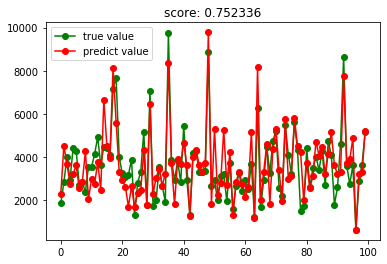

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
score:0.49595966004626957, RMSE:1721.8131248571235


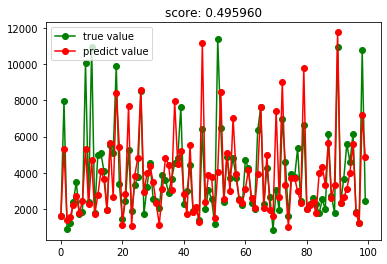

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
score:0.6697910823160788, RMSE:1511.4505828129859


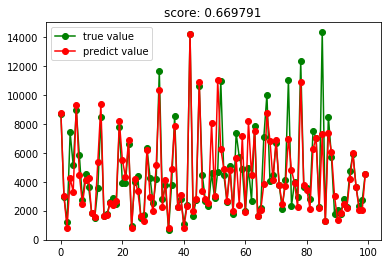

In [18]:
# call decision tree function for different workout type
run_clf = train_model(train_df_run, test_df_run, DecisionTreeRegressor())
bike_clf = train_model(train_df_bike, test_df_bike, DecisionTreeRegressor())
mountain_clf = train_model(train_df_mountain, test_df_mountain, DecisionTreeRegressor())

<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
score:0.7834337671859449, RMSE:923.8064196575666


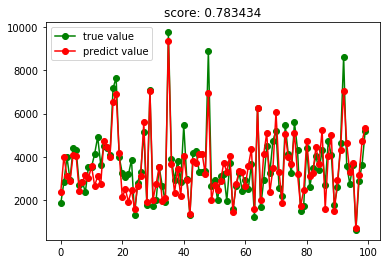

<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
score:0.6420170816111398, RMSE:1451.0571523401854


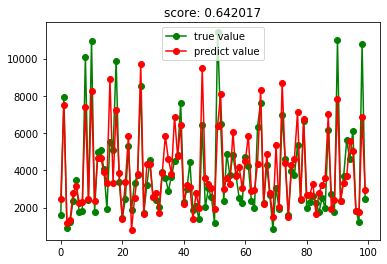

<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
score:0.6750294479837267, RMSE:1499.413986442364


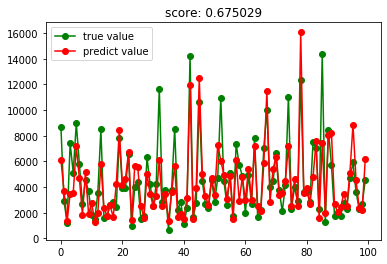

In [19]:
# call neurual network function for different workout type
run_clf = train_model(train_df_run, test_df_run, MLPRegressor())
bike_clf = train_model(train_df_bike, test_df_bike, MLPRegressor())
mountain_clf = train_model(train_df_mountain, test_df_mountain, MLPRegressor())

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
score:0.8690461110112218, RMSE:718.3644053219972


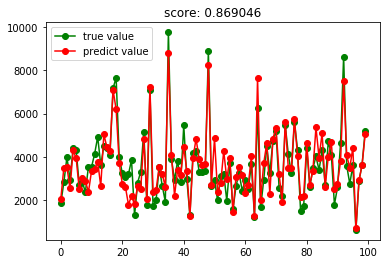

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
score:0.7318645535558862, RMSE:1255.828922724327


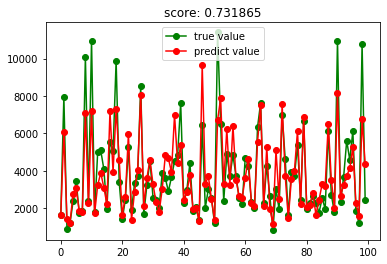

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
score:0.8173955641636028, RMSE:1123.9712825376303


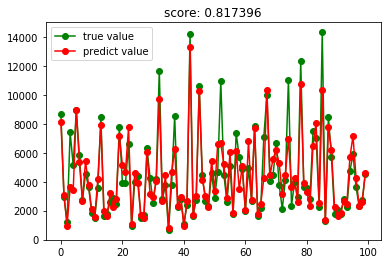

In [20]:
# call random forest function for different workout type
run_clf = train_model(train_df_run, test_df_run, RandomForestRegressor())
bike_clf = train_model(train_df_bike, test_df_bike, RandomForestRegressor())
mountain_clf = train_model(train_df_mountain, test_df_mountain, RandomForestRegressor())

In [21]:
# predict model
def inference(userId, calories, test_df, run_clf, bike_clf, mountain_clf):
    test_df['gender_idx'] = test_df.gender.apply(lambda x:gender_dict[x])
    
    # according to ID index users' records
    run_data = test_df[(test_df.userId==userId)&(test_df.sport=='run')]
    # extract features
    run_data = run_data[['gender_idx', 'calories', 'avg_heart_rate', 'avg_speed']]
    # define calories
    run_data['calories'] = calories
    # predict historical records
    run_pred_list = run_clf.predict(run_data)
    # output result
    run_res = np.mean(run_pred_list)
    
    bike_data = test_df[(test_df.userId==userId)&(test_df.sport=='bike')]
    bike_data = bike_data[['gender_idx', 'calories', 'avg_heart_rate', 'avg_speed']]
    bike_data['calories'] = calories
    bike_pred_list = bike_clf.predict(bike_data)
    bike_res = np.mean(bike_pred_list)
    
    mountain_data = test_df[(test_df.userId==userId)&(test_df.sport=='mountain bike')]
    mountain_data = mountain_data[['gender_idx', 'calories', 'avg_heart_rate', 'avg_speed']]
    mountain_data['calories'] = calories
    mountain_pred_list = mountain_clf.predict(mountain_data)
    mountain_res = np.mean(mountain_pred_list)
    
    print('run : {}, bike : {}, mountainbike : {}'.format(run_res//60, bike_res//60, mountain_res//60))
    
inference(74718, 900, test_df, run_clf, bike_clf, mountain_clf)

run : 64.0, bike : 80.0, mountainbike : 87.0


In [22]:
inference(139383, 400, test_df, run_clf, bike_clf, mountain_clf)

run : 32.0, bike : 37.0, mountainbike : 41.0
